# GRIP : The Sparks Foundation

**Data Science and Business Analytics Intern**

**Author : Piyus Prabhanjans**

**BATCH : July 2022**

**Task 2 : Prediction Using Unsupervised ML**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# url = "https://bit.ly/3kXTdox"
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
X = data.iloc[:,1:4].values

In [7]:
X[:150:10][:]

array([[5.1, 3.5, 1.4],
       [5.4, 3.7, 1.5],
       [5.4, 3.4, 1.7],
       [4.8, 3.1, 1.6],
       [5. , 3.5, 1.3],
       [7. , 3.2, 4.7],
       [5. , 2. , 3.5],
       [5.9, 3.2, 4.8],
       [5.5, 2.4, 3.8],
       [5.5, 2.6, 4.4],
       [6.3, 3.3, 6. ],
       [6.5, 3.2, 5.1],
       [6.9, 3.2, 5.7],
       [7.4, 2.8, 6.1],
       [6.7, 3.1, 5.6]])

**USING ELBOW Method**

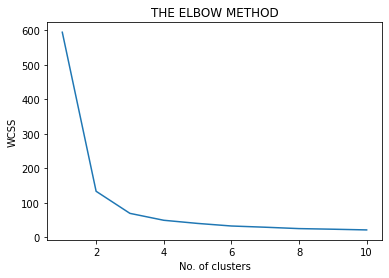

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=35)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("THE ELBOW METHOD")
plt.show()

**So, the optimal no. of clusters will be 3, as observed from WCSS clustering and Elbow Method.**

In [9]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=35)
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

**SHOWING VARIOUS CLUSTERS OF THE IRIS Dataset**

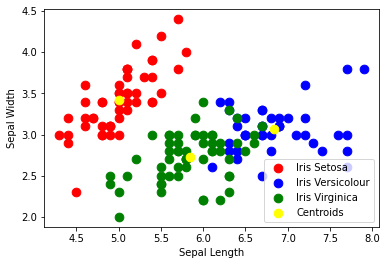

In [11]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=75,c="r",label ="Iris Setosa")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=75,c="b",label ="Iris Versicolour")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=75,c="g",label ="Iris Virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=75,c="yellow",label ="Centroids")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

**CONCLUSION**

Prediction was made using K means Clustering which is a Unsupervised ML technique